In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('covid.csv')

In [3]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


<BarContainer object of 58 artists>

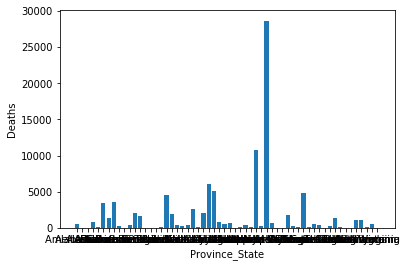

In [4]:
plt.xlabel('Province_State')
plt.ylabel('Deaths')
plt.bar(df['Province_State'],df['Deaths'])

<BarContainer object of 58 artists>

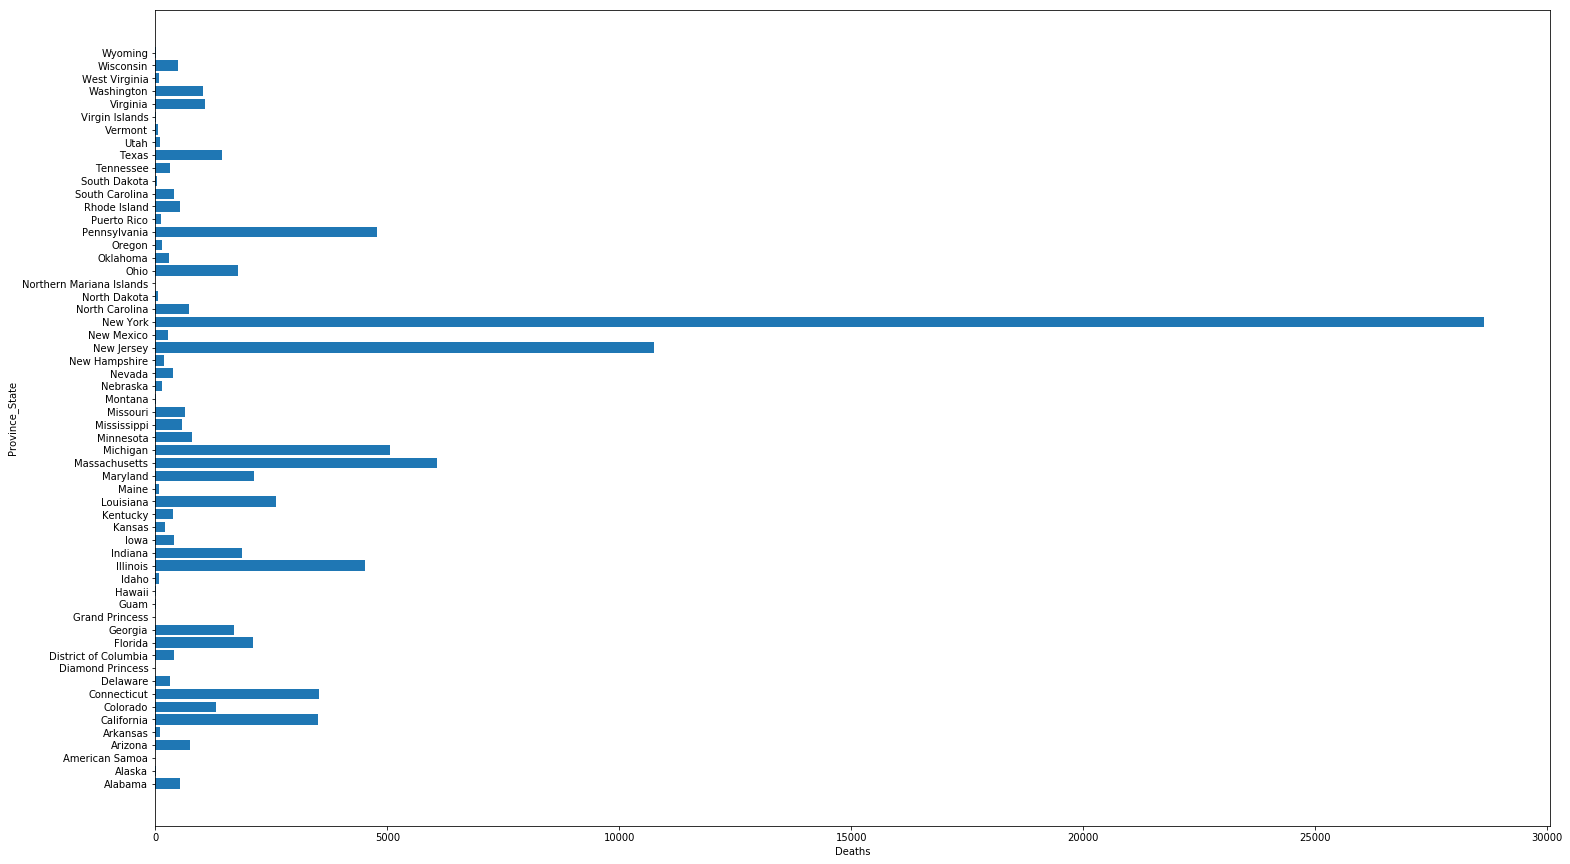

In [5]:
plt.figure(figsize = (25, 15)) 
plt.xlabel('Deaths')
plt.ylabel('Province_State')
plt.barh(df['Province_State'],df['Deaths'])

# -->Here we can see that highest no. of DEATHS are recorded in NEW YORK, then New Jersey and so on.

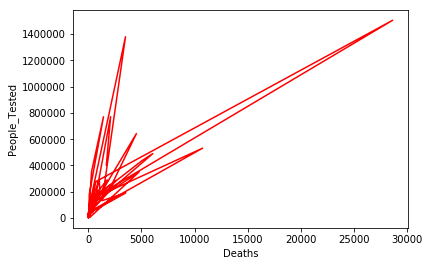

In [6]:
plt.xlabel('Deaths')
plt.ylabel("People_Tested")
plt.plot(df['Deaths'],df['People_Tested'],color = "r")

# We can see that regions where no. of testing is more death rate is low except few states.

# We will remove column that are not required i.e, Country_Region,Last_Update,Lat,Long_

In [7]:
df.drop(['Country_Region','Last_Update','Lat','Long_'],axis=1,inplace=True)

In [8]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


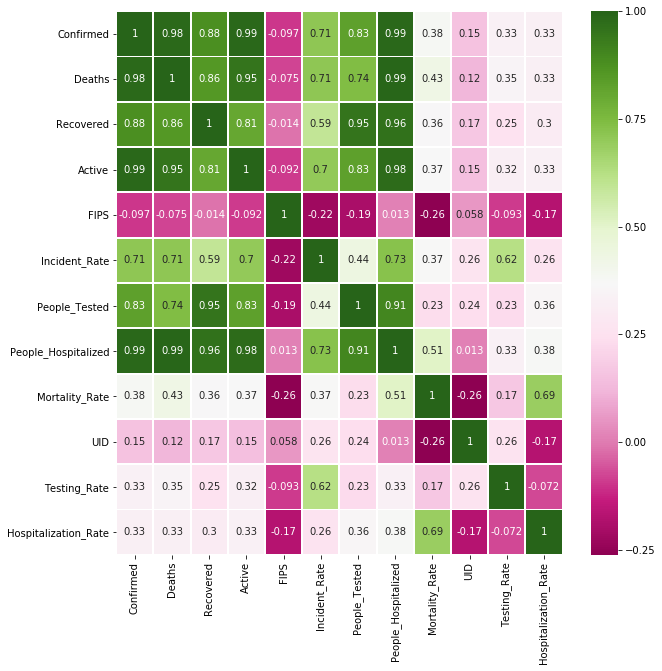

In [9]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(),annot=True,cmap="PiYG",lw=1)

# here we get to know that Death is having -ve correlation with FIPS

# Death is having Strong +ve correalation with confirmed cases, recovered cases, active cases & people_hospitalized

In [10]:
df.isnull().sum()


Province_State           0
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='mean')
df['Recovered']=imp.fit_transform(df[['Recovered']])

In [12]:
df['Incident_Rate']=imp.fit_transform(df[['Incident_Rate']])

In [13]:
df['People_Tested']=imp.fit_transform(df[['People_Tested']])

In [14]:
df['People_Hospitalized']=imp.fit_transform(df[['People_Hospitalized']])

In [15]:
df['Mortality_Rate']=imp.fit_transform(df[['Mortality_Rate']])

In [16]:
df['Hospitalization_Rate']=imp.fit_transform(df[['Hospitalization_Rate']])

In [17]:
df['Testing_Rate']=imp.fit_transform(df[['Testing_Rate']])

In [18]:
df.isnull().sum()

Province_State          0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

# -->Therefore we have removed Null values from each column

In [19]:
df.drop(['ISO3','UID'],axis=1,inplace=True)

# We have removed 2 more columns as they are of no use to our analysis

In [20]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,3353.942386,11.438860
1,Alaska,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,5063.940017,14.342541
2,American Samoa,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,222.857246,14.342541
3,Arizona,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,2272.859351,12.022005
4,Arkansas,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,3189.670370,10.693584


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Province_State'] = le.fit_transform(df['Province_State'])

In [22]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,3353.942386,11.438860
1,1,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,5063.940017,14.342541
2,2,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,222.857246,14.342541
3,3,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,2272.859351,12.022005
4,4,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,3189.670370,10.693584


# We have converted the Categorical data into numerical data for further processing.

In [23]:
df.skew()

Province_State          0.000000
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

In [24]:
from scipy.stats import boxcox
df['Confirmed'].replace(0,df['Confirmed'].mean(axis=0),inplace=True)
df['Confirmed'],lambd1=boxcox(df['Confirmed'])

In [25]:
for column in df.columns:
    df[column].replace(0,df[column].mean(axis=0),inplace=True)

In [26]:
df['Recovered'],lambd2=boxcox(df['Recovered'])

In [27]:
df['Active'],lambd3=boxcox(df['Active'])

In [28]:
df['FIPS'],lambd4=boxcox(df['FIPS'])

In [29]:
df['Incident_Rate'],lambd5=boxcox(df['Incident_Rate'])

In [30]:
df['People_Tested'],lambd6=boxcox(df['People_Tested'])

In [31]:
df['People_Hospitalized'],lambd7=boxcox(df['People_Hospitalized'])

In [32]:
df['Testing_Rate'],lambd8=boxcox(df['Testing_Rate'])

In [33]:
df.skew()

Province_State          0.001628
Confirmed              -0.028434
Deaths                  5.495889
Recovered               0.013146
Active                 -0.078750
FIPS                   -0.450513
Incident_Rate          -0.001589
People_Tested           0.019126
People_Hospitalized     0.102885
Mortality_Rate          0.636103
Testing_Rate            0.225093
Hospitalization_Rate    0.867341
dtype: float64

# Therefore we have removed skewness from our dataset.

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[3.01281587e-02, 1.52104997e-01, 2.83454066e-01, 4.60108452e-01,
        4.21164531e-01, 3.69955001e+00, 4.11101540e-02, 1.68186061e-01,
        4.68591810e-01, 2.66124351e-01, 2.00461084e-01, 7.74497410e-01],
       [1.71624792e+00, 1.39091320e+00, 4.10251499e-01, 1.40966727e+00,
        1.57018693e+00, 2.68761196e+00, 1.77834974e+00, 8.23525649e-01,
        4.84501950e-01, 1.01404697e+00, 6.85006327e-01, 4.73806709e-16],
       [1.65493447e+00, 5.95350924e-01, 1.37576004e-02, 4.60108452e-01,
        6.72967370e-01, 5.99719472e-01, 4.05520294e-01, 2.50237453e+00,
        4.84501950e-01, 3.81836194e-02, 2.66616990e+00, 4.73806709e-16],
       [1.59362103e+00, 2.30230090e-01, 2.27732538e-01, 2.95741187e-02,
        3.25720368e-01, 1.81367226e+00, 3.33495364e-01, 1.72941988e-01,
        3.35563767e-01, 2.36598919e-01, 8.51700617e-01, 6.18955558e-01],
       [1.53230758e+00, 3.64064860e-01, 3.86229329e-01, 1.42015482e-02,
        6.48648195e-01, 1.55851580e+00, 5.67887254e-01, 2.30

In [35]:
threshold=3
print(np.where(z>3))

(array([ 0,  7,  9, 13, 36, 36, 45], dtype=int64), array([ 5, 11,  5,  5,  2,  8, 10], dtype=int64))


In [36]:
df_new=df[(z<3).all(axis=1)]

In [37]:
print(df.shape)
print(df_new.shape)

(58, 12)
(52, 12)


# Therefore we have removed 6 rows as they were coming under OUTLIERS

In [38]:
df=df_new

# MODEL Training

In [39]:
df_x=df.drop('Deaths',axis=1)

In [40]:
y=df['Deaths']

In [42]:
df_x.shape

(52, 11)

In [43]:
y.shape

(52,)

In [44]:
#Scaling the Input
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [46]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (36, 11)
y_train: (36,)
x_test: (16, 11)
y_test: (16,)


In [47]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [48]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor

# -->Selecting Best Algorithm

In [50]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),SVR(),KNeighborsRegressor(),Ridge(),Lasso(),ElasticNet(),DecisionTreeRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print("Score of",m,"is:")
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('standard deviation:',score.std())
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) is:
Score: [-5.12467031  0.8125196   0.5426434  -5.33443483]
Mean Score: -2.275985534495201
standard deviation: 2.9560383141424174


Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False) is:
Score: [-0.2681855  -0.69865845 -0.13663137  0.00887622]
Mean Score: -0.27364977595784845
standard deviation: 0.26422396550483396




C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa

Score of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform') is:
Score: [0.69370538 0.81940717 0.54135171 0.23076622]
Mean Score: 0.571307619073925
standard deviation: 0.21988656025313066


Score of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) is:
Score: [-3.67500173  0.79186849  0.52181559 -3.82255527]
Mean Score: -1.5459682288455696
standard deviation: 2.205495560783877


Score of Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) is:
Score: [-5.37983987  0.81298016  0.54192011 -5.2497088 ]
Mean Score: -2.318662099982985
standard deviation: 2.997997577037211


Score of ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1

# Therefore we will use Kneighbor Regressor as it is having highest mean score

# -->Now we will find the best parameters for our Algorithm

In [51]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsRegressor()
parameters={'n_neighbors':[1,3,5,7,9,11,13,15],'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
clf.best_params_

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\RK\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'algorithm': 'auto', 'n_neighbors': 9}

# Now we have got the best parameters for our model i.e, {'algorithm': 'auto', 'n_neighbors': 9}

In [52]:
knn=KNeighborsRegressor(algorithm='auto', n_neighbors=9)

In [53]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.6153443850013705

In [54]:
pred=knn.predict(x_test)

In [56]:
print('Mean Absolute error:',mean_absolute_error(y_test,pred))
print('Mean Square error:',mean_squared_error(y_test,pred))
print('R2 Score:',r2_score(y_test,pred))

Mean Absolute error: 590.9722222222222
Mean Square error: 769920.336419753
R2 Score: 0.7005325339500201


# -->Therefore we find KNeighborRegressor is best suitable for our dataset.
Now we will save the model.